In [59]:
%load_ext autoreload
%autoreload 2

import os
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from context import ml_project
from ml_project.io import DataHandler
from ml_project.train import neural_nets
from sklearn.preprocessing import StandardScaler
import tables

# To surpress sklearn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
_ = np.seterr(divide='ignore', invalid='ignore')

print(f'Tensorflow version: {tf.__version__}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Tensorflow version: 1.13.1


# How-To

1) Download the zip folder holding the data  
2) Create a directory inside the *PROJECT_ROOT_DIR*/data and give it a suitable name *DIR_NAME*, e.g. "task3_data"   
3) Extract the files from the zip folder into *DIR_NAME*  
4) Set the correct *DIR_NAME* in the following cell...  (no need for full absolute path)

In [60]:
DIR_NAME = 'task3_data'

# Load Data and aggregate feature matrix

In [61]:
data_handler = DataHandler(DIR_NAME)
train_data = data_handler.load_train_data('train.h5', 'h5')
final_test_data = data_handler.load_test_data('test.h5', 'h5')  # only used for submission
final_indices = final_test_data.index

In [62]:
HELD_OUT_TEST_SET_SIZE = 0  # used for out of sample classifier performance evaluation

In [63]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(['y'], axis=1), 
                                                    train_data['y'], 
                                                    test_size=HELD_OUT_TEST_SET_SIZE,
                                                    random_state=42)

X_train, X_test, y_train, y_test = X_train.as_matrix(), X_test.as_matrix(), y_train.as_matrix(), y_test.as_matrix()

# Normalize the data

In [64]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
final_test_data = scaler.transform(final_test_data)
if len(X_test) > 0:
    X_test = scaler.transform(X_test)
    
    
from sklearn import preprocessing




(45324, 120) (45324,)
[2 1 2 ... 1 3 1]


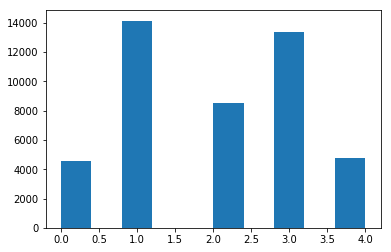

distinct values in y:[2 1 3 4 0]
The minimal amount of samples is 4542
The MAX amount of samples is 14142
            0         1         2         3         4         5         6    \
33051  0.160565  0.536497  0.251176  1.006780  1.040369  0.081993  1.524405   
33507  0.583465 -0.043302 -0.917382  0.740033  2.355569 -0.714169 -0.492176   
19304 -1.216666  1.736623  3.246968  1.701928 -0.498473 -1.816626  0.329574   
33192 -0.301754 -0.171841 -0.051935 -0.436859 -0.026514  0.938563 -1.375377   
26610 -0.196997 -0.046072 -0.210393  0.155937 -0.972579 -0.094780  1.226574   
9547   0.085531 -0.079215  0.442167 -0.470157  0.399083  0.717105 -2.713136   
13138 -0.062397 -1.600773 -1.770947 -0.940993 -1.518250  0.631589 -1.448647   
35443 -0.249224  1.376151  2.147117  0.012212 -1.762225 -0.761712  0.705198   
14256 -0.470772  0.969613  0.046652 -0.564107 -2.138198 -0.746531  0.504702   
9883  -0.004414  1.518043  0.079077  0.514768 -0.492836 -2.604341  0.188060   
26586 -0.272126  1.948218

            0         1         2         3         4         5         6    \
42575  1.203322 -1.161916 -1.626442  0.243753 -0.923961 -0.993518  1.832466   
9181   1.211765  0.639608 -0.185736 -0.170462  1.127516  0.152919 -0.202205   
18935  1.348965 -1.093577 -0.043816  0.010191 -1.381658  1.005829 -0.359220   
23075  2.170578 -0.323202 -0.384562 -0.873093 -1.050833  1.082654  2.135077   
17344  1.161203  0.443773 -1.224025  0.585818 -0.205712  0.626917  0.163424   
38885  1.250970 -0.727725 -0.445866 -0.463683  0.556121 -0.465238  0.104143   
12491  0.210657 -0.106818 -1.068505  0.732780  0.779018 -1.025013 -0.729536   
11563 -0.977364  0.506799 -0.999013  0.800280 -0.772427  0.513280  0.459310   
6263   0.847324  0.897315  0.489085  0.367076 -0.834660 -1.529986 -0.251093   
40306  0.960898  1.453260  1.284851  0.358755  0.786999 -1.723068 -0.122467   
37973  1.214499 -0.849951 -0.939576  0.277749  1.392763  0.857197  0.388471   
14967 -1.969925 -0.858184  0.034405  0.575709 -0.793

              0         1         2         3         4         5         6  \
33051  0.160565  0.536497  0.251176  1.006780  1.040369  0.081993  1.524405   
33507  0.583465 -0.043302 -0.917382  0.740033  2.355569 -0.714169 -0.492176   
19304 -1.216666  1.736623  3.246968  1.701928 -0.498473 -1.816626  0.329574   
33192 -0.301754 -0.171841 -0.051935 -0.436859 -0.026514  0.938563 -1.375377   
26610 -0.196997 -0.046072 -0.210393  0.155937 -0.972579 -0.094780  1.226574   

              7         8         9  ...       111       112       113  \
33051  2.165106  1.348909  0.531005  ...  1.342090  0.670509  0.091690   
33507  1.347047 -0.356237  0.098924  ...  1.024338 -1.191074 -0.260303   
19304  0.384647  0.213146  1.486959  ...  1.398179 -2.242626 -1.638154   
33192 -0.652680 -0.216105  0.823053  ... -0.988137  0.983745  0.652846   
26610  0.185357  0.502611  0.052375  ... -1.199733 -0.180935 -0.845794   

            114       115       116       117       118       119  y  
33051 -1.

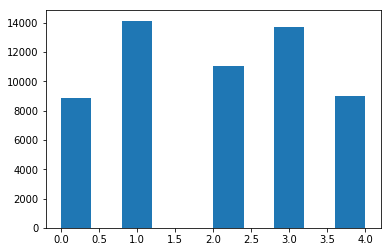

distinct values in y are now:[3 1 0 2 4]


In [129]:
# some outlier removal for
# When we use the DBSCN from last time my machine dies ;(

# IM RELATIVELY CONFIDENT THAT UP-SAMPLING OR DOWN-SAMPLING IN A BETTER WAY SHOULD
# DO THE HARDLINE
import pandas as pd

print(X_train.shape,y_train.shape)
print(y_train)
# balanced?
plt.hist(y_train)
plt.show()
# nope its not at all
#but how...

# lets balance classes
new_combined=pd.DataFrame(X_train)
new_combined['y']=pd.DataFrame(y_train)
print(f'distinct values in y:{new_combined.y.unique()}')
# get distinct y values
y_distinct=new_combined.y.unique()
min_sample_size=min([new_combined[new_combined.y==i].shape[0] for i in y_distinct])
#there is a mean and mx approach that can work, max was too much, so i now even go down to 50%
max_sample_size=int(np.max([new_combined[new_combined.y==i].shape[0] for i in y_distinct]))


print(f"The minimal amount of samples is {min_sample_size}")
print(f"The MAX amount of samples is {max_sample_size}")

balanced_X=pd.DataFrame()
balanced_Y=pd.DataFrame()
# lets upscale somehow, the gaussian approach doesnt work well
# probably since the true distribution is not gaussian
gaussian=False


for i in y_distinct:
    sample_amount=new_combined[new_combined.y==i].shape[0]
    if gaussian:
        #lets check that we dont add too much data
        diff=int((max_sample_size-sample_amount)*0.5)
        #lets assume some gaussian thingy
        working_set=new_combined[new_combined.y==i]
        working_set=working_set.drop(['y'],axis=1)
        if diff>0:
            print(f'generating an addition {diff} samples')
            print(f'working set shape:{working_set.shape}')
            mean=working_set.mean()
            cov=np.cov(working_set.T)
            print(f'shape mean:{mean.shape} shape cov:{cov.shape}')
            #we generate more points assuming a gaussian distribution
            generated=np.random.multivariate_normal(mean, cov, diff)
            print(generated)
            print(f'shape generated:{generated.shape}')
            generated_df=pd.DataFrame(generated)
            generated_df['y']=i
            balanced_X=balanced_X.append(generated_df)
        working_set['y']=i
        balanced_X=balanced_X.append(working_set)
    else:
        # random samples from the distribution and adds them until all classes are balanced
        diff=int((max_sample_size-sample_amount))
        working_set=new_combined[new_combined.y==i]
        working_set=working_set.drop(['y'],axis=1)
        if diff>0:
            # lets try bit how much to skew the org distribution
            generated=working_set.sample(frac=(diff/sample_amount)*0.45,replace=True)
            print(generated)
            print(f'shape generated:{generated.shape}')
            generated_df=pd.DataFrame(generated)
            generated_df['y']=i
            balanced_X=balanced_X.append(generated_df)
        working_set['y']=i
        balanced_X=balanced_X.append(working_set)

    
# ok that should now be muhc more data
print(balanced_X.head())
# shuffle again such that it makes bit more sense
balanced_X=balanced_X.sample(frac=1)
# shuffle again such that it makes bit more sense

balanced_X=balanced_X.sample(frac=1)
# shuffle again such that it makes bit more sense

balanced_X=balanced_X.sample(frac=1)
#shuffle dosnt shuffle as much at it seems #idk
print(balanced_X.head())


balanced_Y=balanced_X.y
balanced_X=balanced_X.drop(['y'],axis=1)

assert balanced_X.shape[0]==balanced_Y.shape[0]
balanced_Y=balanced_Y.values.reshape((-1,))
balanced_X=balanced_X.values
print(f'We had {X_train.shape} samples and have scaled it to {balanced_X.shape} samples')
plt.hist(balanced_Y)
plt.show()
print(f'distinct values in y are now:{pd.DataFrame(balanced_Y)[0].unique()}')


In [130]:
# Lets do some feature selection order nto efficient but idk
from sklearn.feature_selection import SelectKBest, chi2
import sklearn as sk


# scaler = sk.preprocessing.MinMaxScaler(feature_range=(0, 1))
# scaler = scaler.fit(balanced_X)
# X_scaled = scaler.transform(balanced_X)


# print(X_scaled.shape)
# from sklearn.preprocessing import scale
# print(X_scaled)
selecter=SelectKBest(k=120)
X_norm_small = selecter.fit_transform(balanced_X, balanced_Y)
print(X_norm_small.shape)



(56748, 120)


# Helper functions to build, compile and fit models

In [132]:
def three_layer_model(units_first, units_second, units_third, n_final_classes, kernel_size=3):
    """Creates three layer model with dropout and regularization."""
    model = keras.Sequential([
        keras.layers.Dense(2048, activation=tf.nn.relu),
        keras.layers.Dropout(0.5, noise_shape=None, seed=22),
        keras.layers.BatchNormalization(),
         keras.layers.Dense(1024, activation=tf.nn.relu),
         keras.layers.Dropout(0.3, noise_shape=None, seed=33),
         keras.layers.BatchNormalization(),
        
        keras.layers.Dense(256, activation=tf.nn.relu),
        keras.layers.Dropout(0.2, noise_shape=None, seed=666),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dropout(0.2, noise_shape=None, seed=666),
        keras.layers.BatchNormalization(),
        keras.layers.Reshape((8,8)),
        # wierd but seems to work quite well
        keras.layers.MaxPooling1D(pool_size=4, strides=None, padding='valid', data_format='channels_last'),
        keras.layers.Dropout(0.1, noise_shape=None, seed=666),
        keras.layers.Flatten(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation=tf.nn.relu),
        #keras.layers.Embedding(units_third, 16),
        keras.layers.Dropout(0.1, noise_shape=None, seed=666),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(n_final_classes, activation=tf.nn.softmax)
    ])
    return model

def compile_model(model):
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
    
def fit_model(model, epochs, callbacks):
    #print(f'Shape x:{X_train.shape} y:{y_train}')
    print('type x:'+str(type(balanced_X)))
    print('type y:'+str(type(balanced_Y)))

    model.fit(X_norm_small, balanced_Y, epochs=epochs, validation_split=0.2, verbose=1, shuffle=True, workers=-1,
             callbacks=callbacks)
    y_pred = model.predict_classes(X_norm_small)
    print(classification_report(balanced_Y, y_pred))

# Define callbacks and tensorboard logging

In [133]:
from common import DATA_DIR_PATH
from tensorflow.keras import callbacks

In [134]:
LOG_DIR = os.path.join(DATA_DIR_PATH, DIR_NAME, 'logs')
tensorboard = callbacks.TensorBoard()
early_stopping = callbacks.EarlyStopping(patience=10)

# Build models

In [135]:
# U can define multiple models and compare them

models = [
    #('small',  compile_model(three_layer_model(128, 128, 128, 5))),
     
    #('medium', compile_model(three_layer_model(256, 256, 256, 5))),
          ('large',  compile_model(three_layer_model(512, 256, 128, 5)))]

# Or if u decided which one to use just define one and use it
# models = [('baseline', compile_model(three_layer_model(128, 128, 128, 5)))]

# Fit

In [ ]:
EPOCHS = 100  # pretty high since we have early stopping callback anyway

for name, model in models:
    print(f'Fitting model {name}...')
    log_path = os.path.join(LOG_DIR, name + '_' + neural_nets.get_date_time_tag())
    tensorboard.log_dir = log_path
    fit_model(model, epochs=EPOCHS, callbacks=[tensorboard,early_stopping])
              
              
              

Fitting model large...
type x:<class 'numpy.ndarray'>
type y:<class 'numpy.ndarray'>
Train on 45398 samples, validate on 11350 samples
Epoch 1/100
45398/45398 [==============================] - 60s 1ms/sample - loss: 0.7258 - acc: 0.7406 - val_loss: 0.3716 - val_acc: 0.8732
Epoch 2/100
 2528/45398 [>.............................] - ETA: 54s - loss: 0.5321 - acc: 0.8192

# For better visualization of all current and past runs, use tensorboard
1) Go to the data directory (e.g. DATA_DIR_PATH/task3_data)  
2) Create a folder names "logs" (mkdir logs)  
3) Type ```tensorboard --logdir=logs```

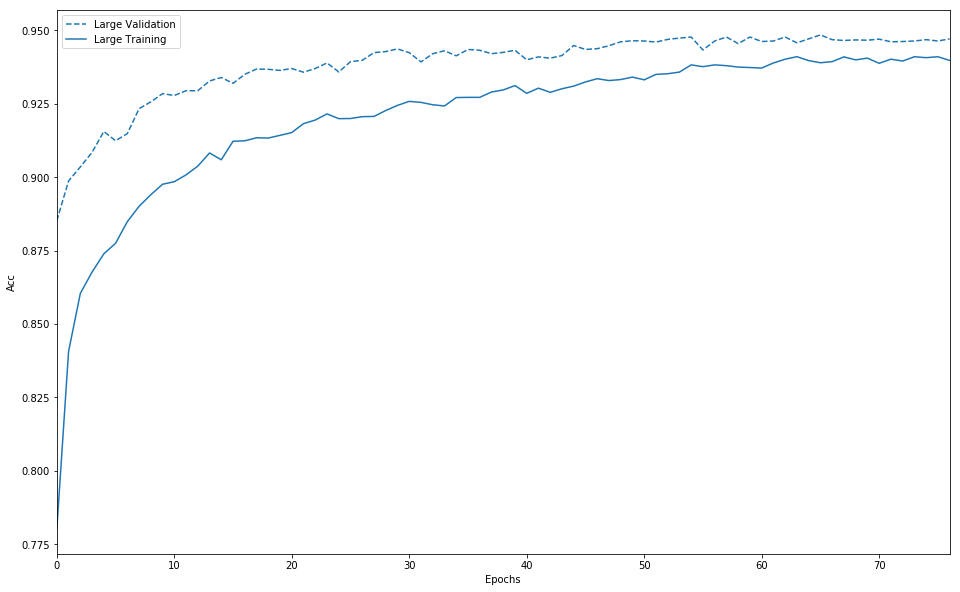

In [97]:
neural_nets.plot_history(models)  # can add more models as needed


# Performance evaluation on held out test dat
This is the section where we get a sense of how well our trained model is doing on the part of the training set we did not touch during training.  
**Only performed if HELD_OUT_TEST_SET_SIZE > 0**

In [98]:
from scikitplot.metrics import plot_confusion_matrix
from scikitplot.metrics import plot_roc

ModuleNotFoundError: No module named 'scikitplot'

In [99]:
def evaluate_models(models):
    results = {}
    for name, model in models:
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        results[name] = {'test accuracy': test_acc, 'test loss': test_loss}

    return pd.DataFrame(results).transpose()

def select_best_model(results_df, models):
    best_model_name = results_df.idxmax()['test accuracy']
    best_model = None
    for name, model in models:
        if name == best_model_name:
            best_model = model
            break
    return best_model_name, best_model


if len(X_test) > 0:
    results_df = evaluate_models(models)
    best_model_name, model = select_best_model(results_df, models)
    print(f'Best model: {best_model_name}')
    print(results_df)
    y_pred_proba = model.predict(X_test)
    y_pred = [np.argmax(proba) for proba in y_pred_proba]
    _ = plot_confusion_matrix(y_test, y_pred, figsize=(12, 8))
    _ = plot_roc(y_test, y_pred_proba, figsize=(8, 8))
else:
    print('There is no test data to test on.')

There is no test data to test on.


# Perform final prediction on provided test data set
Now we perform predictions on the provided, unlabelled data set for submission

In [100]:
y_pred_final = [np.argmax(proba) for proba in model.predict(selecter.transform(final_test_data))]
y_pred_ids = final_indices



# Store the data
Putting everything into the right format and storing the results in the working data directory

In [101]:
data_handler.store_results_task3(y_pred_final, y_pred_ids)